## Check image orientations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from twaidata.MRI_preprep.io import load_nii_img
from twaidata.mri_dataset_directory_parsers.MSS3_multirater import MSS3MultiRaterDataParser
from twaidata.mri_dataset_directory_parsers.LBC_multirater import LBCMultiRaterDataParser
from twaidata.mri_dataset_directory_parsers.WMHChallenge_Unified import WMHChallengeInterRaterDirParser
from twaidata.mri_dataset_directory_parsers.EdData import EdDataParser
from tqdm import tqdm
from natsort import natsorted

In [2]:
parser_mss3 = MSS3MultiRaterDataParser(
        # paths on the cluster for the in house data
        "/home/s2208943/datasets/Inter_observer",
        "/home/s2208943/preprocessed_data/MSS3_InterRaterData"
    )

parser_lbc = LBCMultiRaterDataParser(
        # paths on the cluster for the in house data
        "/home/s2208943/datasets/Inter_observer",
        "/home/s2208943/preprocessed_data/LBC_InterRaterData"
    )

parser_ed = EdDataParser(
    "/home/s2208943/datasets/CVD/mixedCVDrelease",
    "/home/s2208943/preprocessed_data/Ed_CVD"
)

parser_challenge = WMHChallengeInterRaterDirParser(
    "/home/s2208943/datasets/WMH_Challenge",
    "/home/s2208943/preprocessed_data/WMHChallenge_InterRaterData"
)

In [7]:
def visualise_rater_files(name, filemap, colorbar=False):
    print("-------")
    print(name)
    num_imgs = len(filemap.keys())
    
    def get_img(key):
        try:
            return load_nii_img(os.path.join(filemap[key]['outpath'], filemap[key]['outfilename'] + ".nii.gz"))[0]
        except:
            print(f"failed for {key}")
            return None
    
    imgs = {key: get_img(key) for key in tqdm(natsorted(list(filemap.keys())))}
    
    fig, axs = plt.subplots(3, num_imgs, figsize=(20, 10))
    
    print(imgs.keys())
    # print(imgs)
    num_slices = imgs['FLAIR'].shape[-1]
    islices = [num_slices // 4, num_slices // 2, (num_slices // 4) * 3]
    for i in range(3):
        for j, key in enumerate(imgs.keys()):
            ax = axs[i][j]
            if imgs[key] is not None:
                im = ax.imshow(imgs[key][:,:,islices[i]], cmap='magma')
                if i == 0:
                    ax.set_title(key)
                if colorbar:
                    plt.colorbar(im, ax=ax)
                
    plt.show()
    plt.clf()


def plot_first_image(parser):
    iomap = parser.get_dataset_inout_map()
    for ind, filemap in iomap.items():
        visualise_rater_files(ind, filemap, colorbar=True)
        break


-------
training_Amsterdam_GE3T_132


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 15.52it/s]


dict_keys(['FLAIR', 'T1', 'wmh', 'wmho3', 'wmho4'])


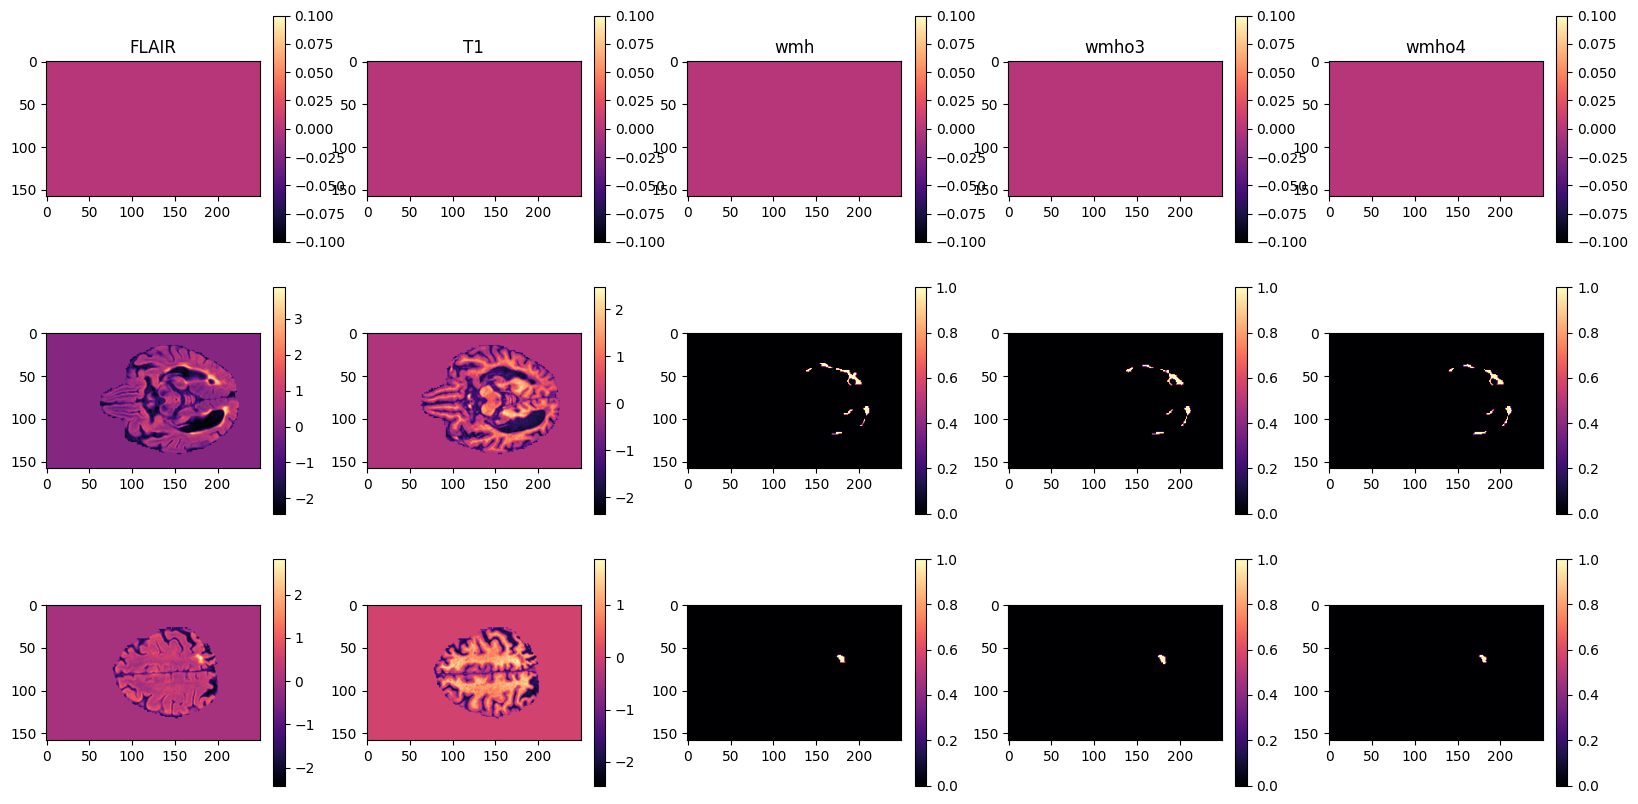

<Figure size 640x480 with 0 Axes>

In [8]:
plot_first_image(parser_challenge)

-------
MSS3_ED_013_V1


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 18.08it/s]


dict_keys(['FLAIR', 'T1', 'lacune', 'wmhes', 'wmhmvh'])


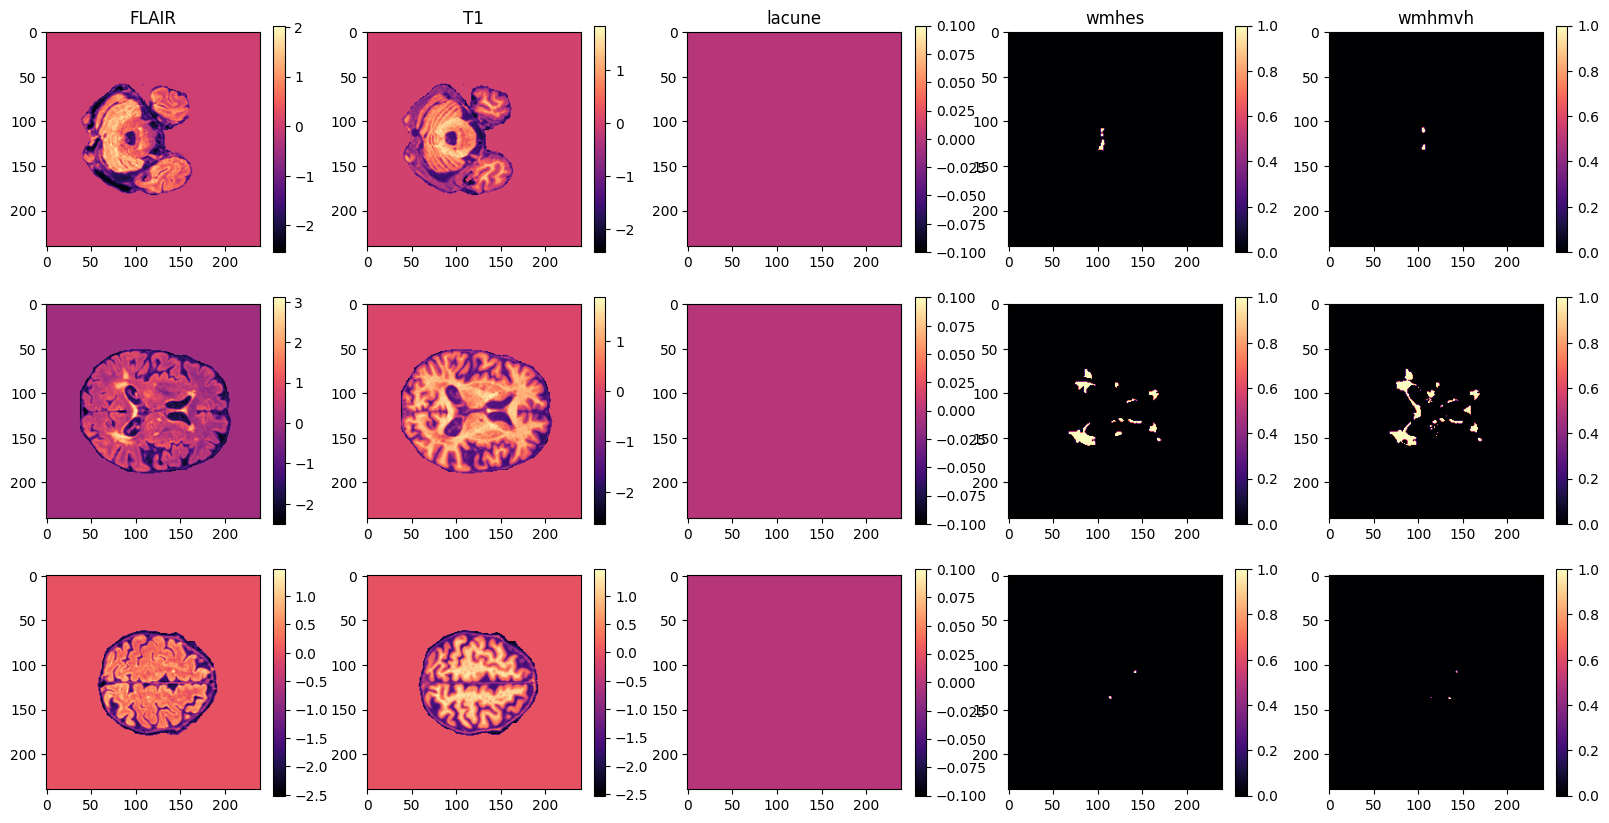

<Figure size 640x480 with 0 Axes>

In [9]:
plot_first_image(parser_mss3)

In [11]:
iomap = parser_challenge.get_dataset_inout_map()
for ind, filemap in iomap.items():
    break

In [13]:
f = filemap['T1']
fp = os.path.join(f['outpath'], f['outfilename'])

In [18]:
img = load_nii_img(fp)[0]

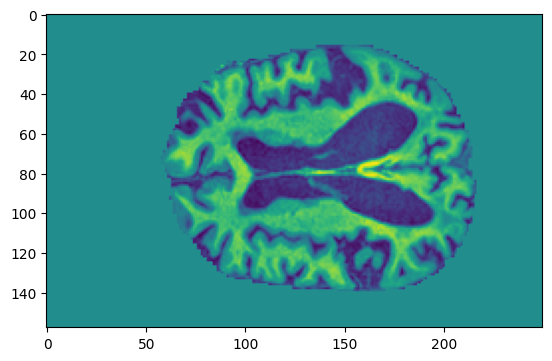

In [22]:
plt.imshow(img[:,:,50])

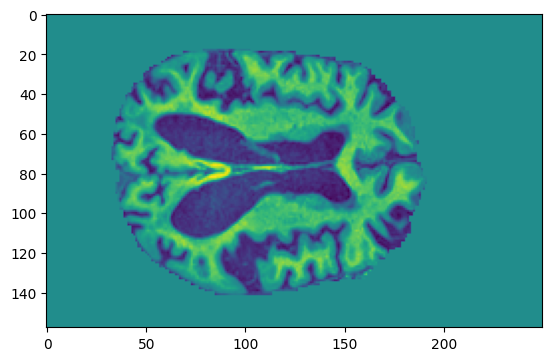

In [29]:
plt.imshow(np.flip(np.flip(img, axis=1), axis=0)[:,:,50])

In [30]:
header = load_nii_img(fp)[1]

In [34]:
header.keys()

['sizeof_hdr',
 'data_type',
 'db_name',
 'extents',
 'session_error',
 'regular',
 'dim_info',
 'dim',
 'intent_p1',
 'intent_p2',
 'intent_p3',
 'intent_code',
 'datatype',
 'bitpix',
 'slice_start',
 'pixdim',
 'vox_offset',
 'scl_slope',
 'scl_inter',
 'slice_end',
 'slice_code',
 'xyzt_units',
 'cal_max',
 'cal_min',
 'slice_duration',
 'toffset',
 'glmax',
 'glmin',
 'descrip',
 'aux_file',
 'qform_code',
 'sform_code',
 'quatern_b',
 'quatern_c',
 'quatern_d',
 'qoffset_x',
 'qoffset_y',
 'qoffset_z',
 'srow_x',
 'srow_y',
 'srow_z',
 'intent_name',
 'magic']

In [35]:
iomap2 = parser_mss3.get_dataset_inout_map()
for ind2, filemap2 in iomap2.items():
    break

In [36]:
f2 = filemap2['T1']
fp2 = os.path.join(f2['outpath'], f2['outfilename'])

In [37]:
img2 = load_nii_img(fp2)[0]

In [39]:
img2.shape

(240, 240, 53)

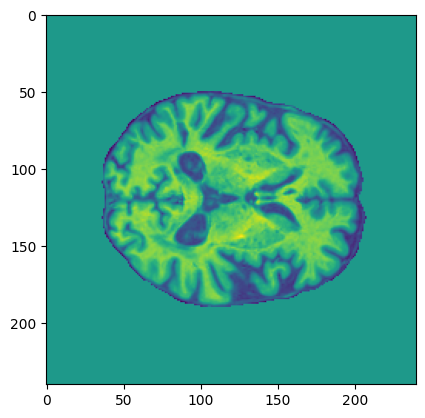

In [40]:
plt.imshow(img2[:,:,25])

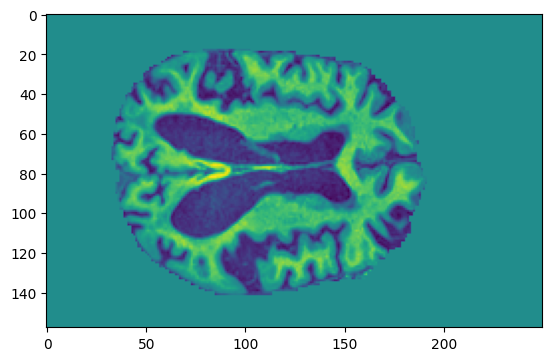

In [29]:
plt.imshow(np.flip(np.flip(img, axis=1), axis=0)[:,:,50])

In [42]:
example_img = "/home/s2208943/preprocessed_data/WMHChallenge_InterRaterData/training/Singapore/imgs/50_FLAIR.nii.gz"
example_img = load_nii_img(example_img)[0]



In [44]:
example_img.shape

(256, 232, 48)

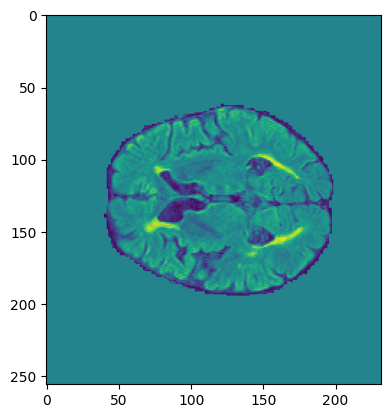

In [46]:
plt.imshow(example_img[:,:,24])

In [49]:
import nibabel as nib
def flip_orientation(nii_file, output_file):
    # Load the NIfTI file
    img = nib.load(nii_file)
    data = img.get_fdata()
    affine = img.affine
    
    # Flip the x axis (Right-to-Left to Left-to-Right)
    flipped_data = np.flip(data, axis=0)
    # Update the affine matrix for x axis flip
    new_affine = affine.copy()
    new_affine[0,0] *= -1
    new_affine[0,3] = affine[0,3] - affine[0,0] * (data.shape[0] - 1)

    # Flip the y axis (Anterior-to-Posterior to Posterior-to-Anterior)
    # If needed based on desired orientation flip, uncomment and modify the following:
    flipped_data = np.flip(flipped_data, axis=1)
    new_affine[1,1] *= -1
    new_affine[1,3] = affine[1,3] - affine[1,1] * (data.shape[1] - 1)

    # Create a new NIfTI image
    new_img = nib.Nifti1Image(flipped_data, new_affine)
    
    # Save the flipped image
    nib.save(new_img, output_file)

# Example usage
flip_orientation("/home/s2208943/preprocessed_data/WMHChallenge_InterRaterData/training/Singapore/imgs/50_FLAIR.nii.gz", "/home/s2208943/test_img.nii.gz")


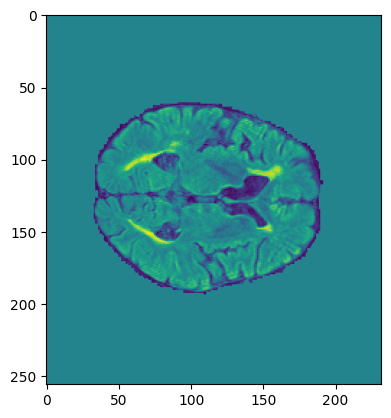

In [50]:
example_img = "/home/s2208943/test_img.nii.gz"
example_img = load_nii_img(example_img)[0]
plt.imshow(example_img[:,:,24])


In [44]:
example_img.shape

(256, 232, 48)

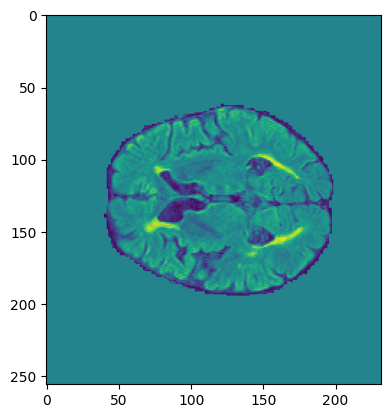

### before

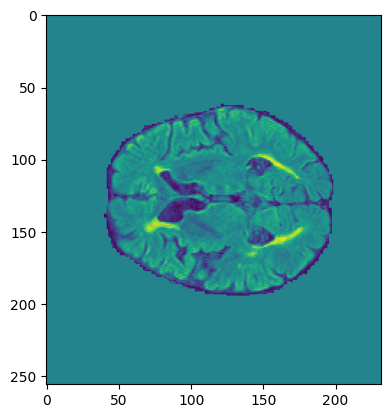

In [2]:
example_img = "/home/s2208943/preprocessed_data/WMHChallenge_InterRaterData/training/Singapore/imgs/50_FLAIR.nii.gz"
example_img = load_nii_img(example_img)[0]
plt.imshow(example_img[:,:,24])

### after

In [3]:
%load_ext autoreload

In [4]:
%autoreload

In [5]:
from twaidata.MRI_preprep.reorient_image import check_image_orientation

In [6]:
check_image_orientation("/home/s2208943/preprocessed_data/WMHChallenge_InterRaterData/training/Singapore/imgs/50_FLAIR.nii.gz")

REORIENTING AXIS:  x
REORIENTING AXIS:  y


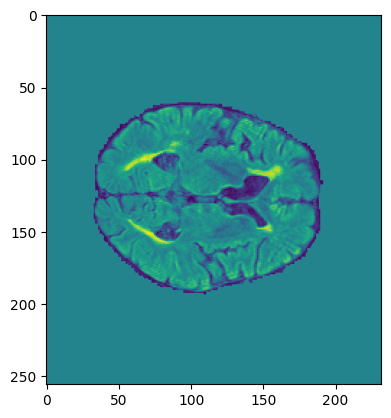

In [7]:
example_img = "/home/s2208943/preprocessed_data/WMHChallenge_InterRaterData/training/Singapore/imgs/50_FLAIR.nii.gz"
example_img = load_nii_img(example_img)[0]
plt.imshow(example_img[:,:,24])

In [11]:
import nibabel as nib
example_img = "/home/s2208943/preprocessed_data/unoriented_WMHChallenge_InterRaterData/training/Singapore/imgs/50_FLAIR.nii.gz"
img = nib.load(example_img)
data = img.get_fdata()
affine = img.affine

In [18]:
affine

array([[ 9.99395609e-01, -2.15962100e-05,  1.04286954e-01,
         3.87768799e+02],
       [ 3.11354827e-03,  9.96036232e-01,  2.66681492e-01,
         3.52072357e+02],
       [ 3.46226096e-02,  8.89483392e-02,  2.98630285e+00,
        -5.96424713e+01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

In [12]:
data.shape

(256, 232, 48)

In [29]:
import SimpleITK as sitk

In [37]:
example_img = "/home/s2208943/preprocessed_data/unoriented_WMHChallenge_InterRaterData/" \
                + "training/Singapore/imgs/68_FLAIR.nii.gz"
img = sitk.ReadImage(example_img)

In [38]:
img.GetDirection()

(0.9998816724316956,
 2.1428662598969946e-05,
 0.015383129872012954,
 -0.0031408550761178222,
 0.979217814654685,
 0.20278710856468918,
 -0.015059089102137458,
 -0.20281141734063018,
 0.9791020109852261)

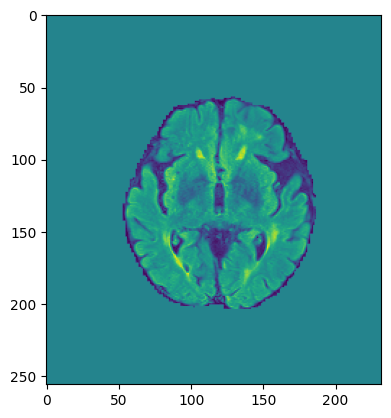

In [54]:
arr = sitk.GetArrayFromImage(img)
plt.imshow(arr[22])

(48, 256, 232)


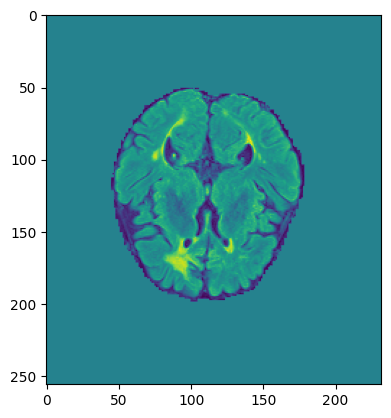

In [68]:
reoriented = sitk.DICOMOrient(img, 'RAS')
arr = sitk.GetArrayFromImage(reoriented)
print(arr.shape)
plt.imshow(arr[24])

In [66]:
sitk.WriteImage(reoriented, "/home/s2208943/test2.nii.gz")

In [78]:
example_img = "/home/s2208943/test2.nii.gz"
example_img = sitk.ReadImage(example_img)
example_img = sitk.GetArrayFromImage(example_img)



In [79]:
example_img.shape

(48, 256, 232)

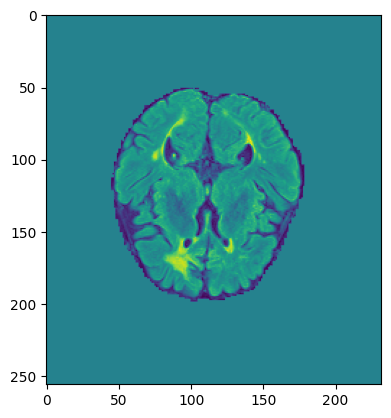

In [80]:
plt.imshow(example_img[24,:,:])

### COMPARING TO A MSS3 IMAGE

In [71]:
example_img = "/home/s2208943/preprocessed_data/MSS3_InterRaterData/imgs/MSS3_ED_001_V1_FLAIR.nii.gz"
example_img = sitk.ReadImage(example_img)
example_img = sitk.GetArrayFromImage(example_img)



In [73]:
example_img.shape

(53, 240, 240)

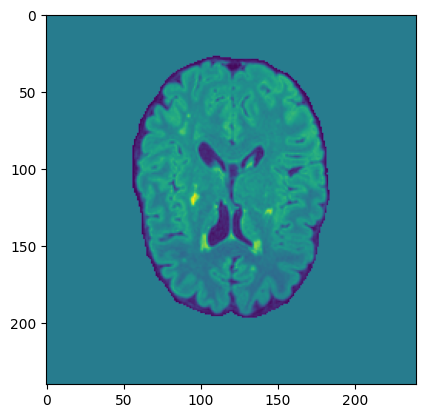

In [77]:
plt.imshow(example_img[29,:,:])

In [83]:
import os

txt_files = []
for root, dirs, files in os.walk("/home/s2208943/preprocessed_data"):
    for file in files:
        if file.endswith(".nii.gz"):
            txt_files.append(os.path.join(root, file))


In [86]:
flairs = [f for f in txt_files if "FLAIR" in f]

In [87]:
len(flairs)

500

In [92]:
selected = [flairs[i] for i in [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 499]]

In [93]:
selected

['/home/s2208943/preprocessed_data/Ed_CVD/domainD/imgs/CVD251_FLAIR.nii.gz',
 '/home/s2208943/preprocessed_data/Ed_CVD/domainD/imgs/CVD116_FLAIR.nii.gz',
 '/home/s2208943/preprocessed_data/Ed_CVD/domainD/imgs/CVD302_FLAIR.nii.gz',
 '/home/s2208943/preprocessed_data/Ed_CVD/domainC/imgs/CVD011_FLAIR.nii.gz',
 '/home/s2208943/preprocessed_data/Ed_CVD/domainA/imgs/CVD225_FLAIR.nii.gz',
 '/home/s2208943/preprocessed_data/WMHChallenge_InterRaterData/training/Utrecht/imgs/39_FLAIR.nii.gz',
 '/home/s2208943/preprocessed_data/WMHChallenge_InterRaterData/training/Amsterdam_GE3T/imgs/105_FLAIR.nii.gz',
 '/home/s2208943/preprocessed_data/WMHChallenge_InterRaterData/test/Singapore/imgs/88_FLAIR.nii.gz',
 '/home/s2208943/preprocessed_data/WMHChallenge_InterRaterData/test/Utrecht/imgs/13_FLAIR.nii.gz',
 '/home/s2208943/preprocessed_data/MSS3_InterRaterData/imgs/MSS3_ED_042_V1_FLAIR.nii.gz',
 '/home/s2208943/preprocessed_data/MSS3_InterRaterData/imgs/MSS3_ED_025_V1_FLAIR.nii.gz']

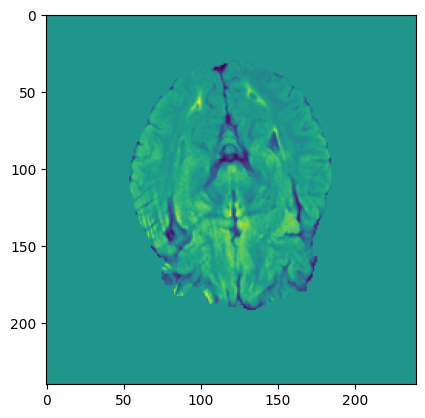

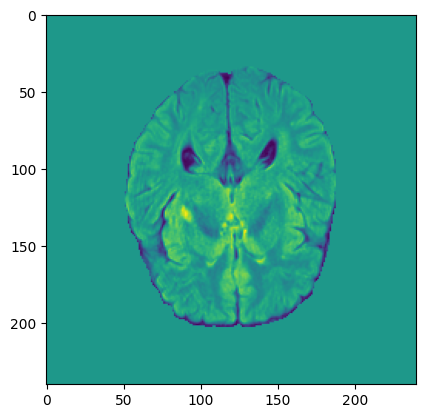

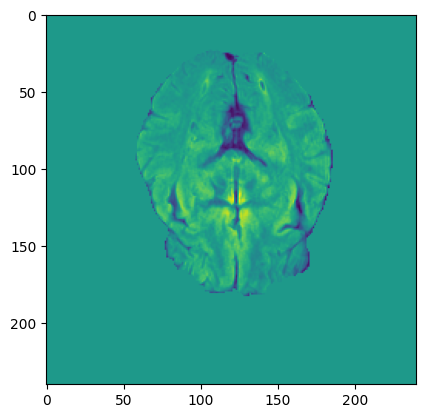

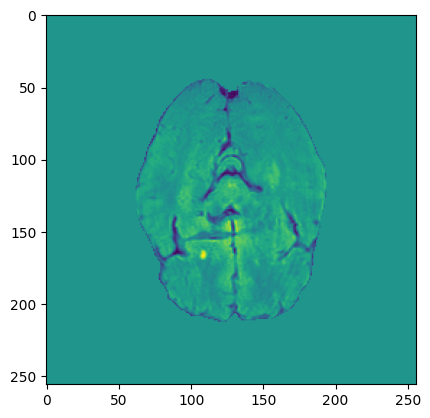

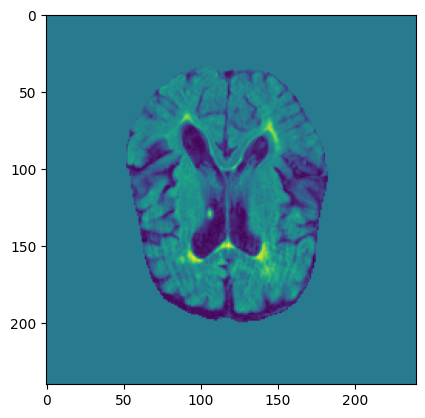

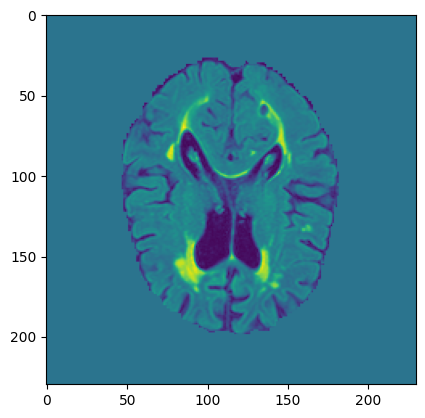

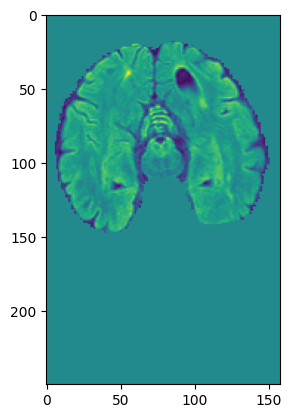

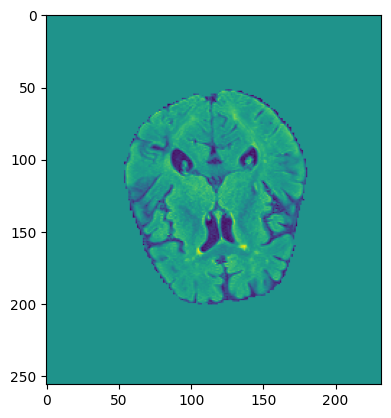

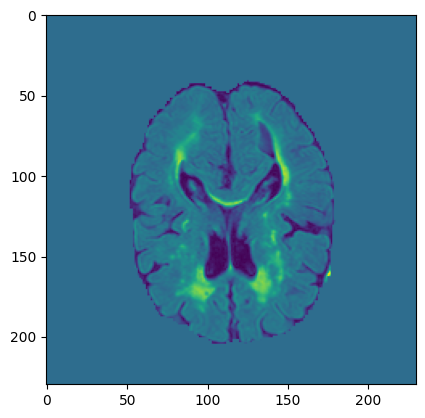

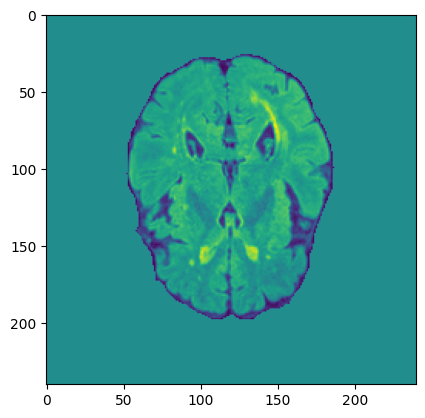

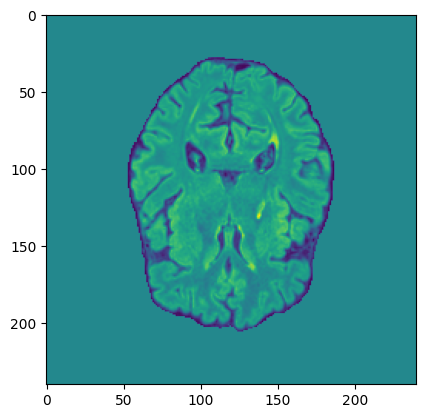

In [94]:
for img in selected:
    img = sitk.GetArrayFromImage(sitk.ReadImage(img))
    plt.imshow(img[img.shape[0]//2])
    plt.show()